It is a bit confusing to understand the distribution of the data. Here, I collected the information I've found from the internet about Anderson Test.You may check the references for detailed information. 

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
from matplotlib import pyplot as plt
from scipy.stats import anderson
from scipy.stats import expon

## Application of Anderson Test

References:

- https://www.statology.org/anderson-darling-test-python/ [1]
- https://towardsdatascience.com/methods-for-normality-test-with-application-in-python-bb91b49ed0f5 [2]
- https://www.geeksforgeeks.org/how-to-perform-an-anderson-darling-test-in-python/ [3]
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html [4]

In [2]:
#Create random data
np.random.seed(0)
data = np.random.randint(0, 10, size=50)

In [3]:
# Apply Test
result = anderson(data, dist='norm')
print(result)

AndersonResult(statistic=1.1926463985076836, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [4]:
#Decide to Reject & Not Reject the Null Hypothesis (null hypothesis is the default value 'norm')
if result[0] > result[1][2]:
    print('Null hypothesis can be rejected at', result[2][2], ' %significance level')
else: 
    print('Null hypothesis cant be rejected.')

Null hypothesis can be rejected at 5.0  %significance level


In [5]:
# Useful Stats
print('statistics:', np.round(result[0],3))
print('critical value at defined significance level:', result[1][2])
print('Significance Level:', result[2][2])

statistics: 1.193
critical value at defined significance level: 0.736
Significance Level: 5.0


### How to Evaluate?

In [18]:
print("""
The test statistic is {} \n
We can compare this value to each critical value that corresponds to each significance level to see if the test results are significant. \n
For example:The critical value for α = 0.01 is 1.021. \n
Because the test statistic {} is greater than this critical value, the results are significant at a significance level of 0.01. \n
The critical value for α = 0.025 is 0.858. Because the test statistic (1.1926) is greater than this critical value, the results are significant at a significance level of 0.025. \n
And so on. \n
We can see that the test results are significant at every significance level, which means we would reject the null hypothesis of the test no matter which significance level we choose to use.\n 
Thus, we have sufficient evidence to say that the sample data is not normally distributed.[1]
""".format(np.round(result[0],3), np.round(result[0],3)))


The test statistic is 1.193 

We can compare this value to each critical value that corresponds to each significance level to see if the test results are significant. 

For example:The critical value for α = 0.01 is 1.021. 

Because the test statistic 1.193 is greater than this critical value, the results are significant at a significance level of 0.01. 

The critical value for α = 0.025 is 0.858. Because the test statistic (1.1926) is greater than this critical value, the results are significant at a significance level of 0.025. 

And so on. 

We can see that the test results are significant at every significance level, which means we would reject the null hypothesis of the test no matter which significance level we choose to use.
 
Thus, we have sufficient evidence to say that the sample data is not normally distributed.[1]



##  Generate Exponential Distribution

(array([6.16384337e-03, 2.06673883e-03, 7.32125442e-04, 2.47150627e-04,
        7.27462223e-05, 3.07772479e-05, 5.59586325e-06, 2.79793163e-06,
        9.32643875e-07, 3.73057550e-06]),
 array([7.24522631e-03, 1.07229308e+02, 2.14451371e+02, 3.21673433e+02,
        4.28895496e+02, 5.36117558e+02, 6.43339621e+02, 7.50561684e+02,
        8.57783746e+02, 9.65005809e+02, 1.07222787e+03]),
 <BarContainer object of 10 artists>)

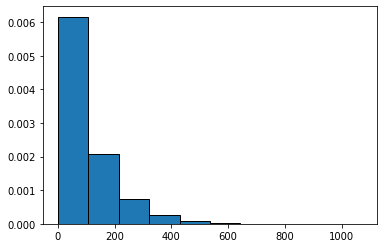

In [6]:
#generate exponential distribution
exp_data = expon.rvs(scale=100, size=10000)

#create histogram 
plt.hist(exp_data, density=True, edgecolor='black')

## Apply Anderson Test

In [9]:
defined_distribution= 'norm'

test_result = anderson(exp_data, dist=defined_distribution)
if test_result[0] > test_result[1][2]:
    print('Null hypothesis: "', defined_distribution,  '" can be rejected at', test_result[2][2], ' % significance level.')
else: 
    print('Null hypothesis cant be rejected. It is ', defined_distribution, 'distribution.')


print('')
print(test_result)
print('')   
print('statistics:', np.round(test_result[0],3))
print('critical value at defined significance level:', test_result[1][2])
print('Significance Level:', test_result[2][2])

Null hypothesis: " norm " can be rejected at 5.0  % significance level.

AndersonResult(statistic=468.17207168700224, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

statistics: 468.172
critical value at defined significance level: 0.787
Significance Level: 5.0


In [10]:
defined_distribution= 'expon'

test_result = anderson(exp_data, dist=defined_distribution)
if test_result[0] > test_result[1][2]:
    print('Null hypothesis can be rejected at', test_result[2][2], ' % significance level.')
else: 
    print('Null hypothesis cant be rejected. It is "', defined_distribution, '" distribution.')


print('')
print(test_result)
print('')   
print('statistics:', np.round(test_result[0],3))
print('critical value at defined significance level:', test_result[1][2])
print('Significance Level:', test_result[2][2])

Null hypothesis cant be rejected. It is " expon " distribution.

AndersonResult(statistic=0.5943139450810122, critical_values=array([0.922, 1.078, 1.341, 1.606, 1.957]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

statistics: 0.594
critical value at defined significance level: 1.341
Significance Level: 5.0
